Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<u>**Hands-on Activity 1.3** | **Regularization**
**Name** | Cu, Angelo Luis C.
**Section** | CPE32S3
**Date Performed**: | 2/3/2025
**Date Submitted**: | 2/3/2025
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST 


#### Procedures
Load the necessary libraries

In [31]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [33]:
x_train[0].shape

(28, 28)

Check the sample train data

In [34]:
x_train[333] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [35]:

y_train[333]

8

Check the actual image

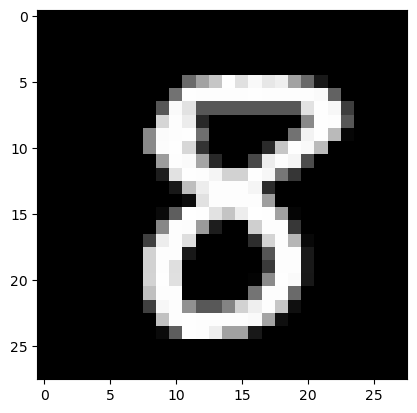

In [36]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [37]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [38]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [39]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512. 
* Use dropout of 0.2 
* Check the model summary

In [40]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [42]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.8455 - val_loss: 0.1933 - val_accuracy: 0.9420
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.9258 - val_loss: 0.1479 - val_accuracy: 0.9521
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1998 - accuracy: 0.9406 - val_loss: 0.1258 - val_accuracy: 0.9610
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1745 - accuracy: 0.9478 - val_loss: 0.1158 - val_accuracy: 0.9655
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1545 - accuracy: 0.9536 - val_loss: 0.1116 - val_accuracy: 0.9666
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1442 - accuracy: 0.9572 - val_loss: 0.1013 - val_accuracy: 0.9689
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1332 - accuracy: 0.9596 - val_loss: 0.0970 - val_accuracy: 0.9705
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [43]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09388313442468643
Test accuracy: 0.9778000116348267


Interpret the result

The results suggest that the model performed well, with the loss being low (around 0.1) and the accuracy being high (0.97) despite being in the testing sample.

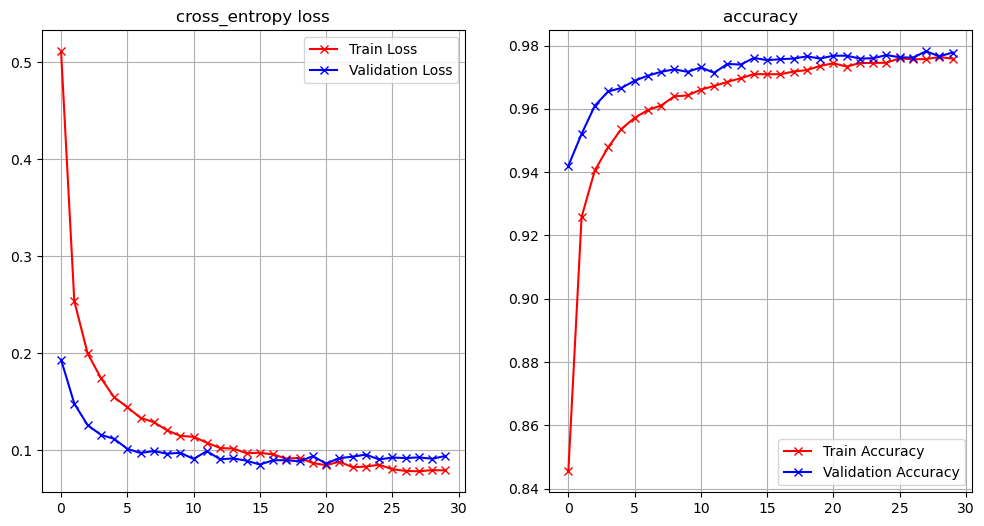

In [44]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

Interpret the result

The loss and accuracy plots suggest that the model could be used even when epochs are only at around 10, with minimal gains and losses after that point.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [45]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

In [46]:
model_1.summary()
# It shows that the first layer has 314000 parameters, the second layer has 120300 parameters, and the third layer has 3010 parameters.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               120300    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128
epochs = 20
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3340 - accuracy: 0.8972 - val_loss: 0.1361 - val_accuracy: 0.9568
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1538 - accuracy: 0.9541 - val_loss: 0.0984 - val_accuracy: 0.9682
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1191 - accuracy: 0.9641 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0997 - accuracy: 0.9699 - val_loss: 0.0812 - val_accuracy: 0.9766
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0879 - accuracy: 0.9739 - val_loss: 0.0743 - val_accuracy: 0.9788
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0793 - accuracy: 0.9767 - val_loss: 0.0754 - val_accuracy: 0.9780
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9783 - val_loss: 0.0810 - val_accuracy: 0.9784
Epoch 

In [48]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.07885340601205826
Test accuracy: 0.9835000038146973


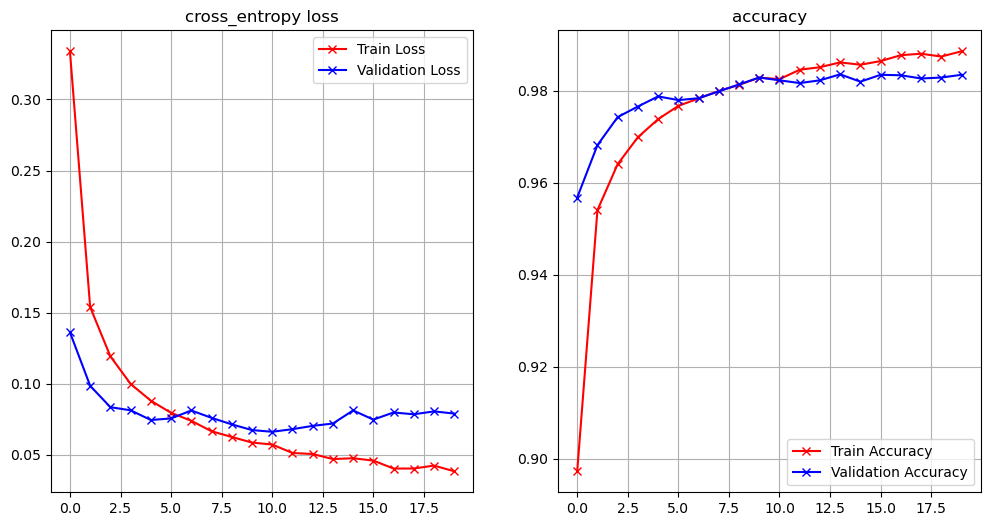

In [49]:
plot_loss_accuracy(history_1)

In [50]:
# Apply l2 and dropout regularization to a new model 
from keras import regularizers
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))


In [51]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               314000    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               120300    
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
learning_rate = .002
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 256
epochs = 30
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 2s 6ms/step - loss: 2.1105 - accuracy: 0.8421 - val_loss: 0.6820 - val_accuracy: 0.9033
Epoch 2/30
235/235 [==============================] - 1s 6ms/step - loss: 0.6716 - accuracy: 0.8915 - val_loss: 0.5704 - val_accuracy: 0.9151
Epoch 3/30
235/235 [==============================] - 1s 6ms/step - loss: 0.5943 - accuracy: 0.9026 - val_loss: 0.5253 - val_accuracy: 0.9154
Epoch 4/30
235/235 [==============================] - 1s 6ms/step - loss: 0.5505 - accuracy: 0.9097 - val_loss: 0.4759 - val_accuracy: 0.9340
Epoch 5/30
235/235 [==============================] - 1s 6ms/step - loss: 0.5239 - accuracy: 0.9151 - val_loss: 0.4355 - val_accuracy: 0.9412
Epoch 6/30
235/235 [==============================] - 1s 6ms/step - loss: 0.4989 - accuracy: 0.9193 - val_loss: 0.4060 - val_accuracy: 0.9437
Epoch 7/30
235/235 [==============================] - 1s 6ms/step - loss: 0.4831 - accuracy: 0.9208 - val_loss: 0.4222 - val_accuracy: 0.9372
Epoch 

In [53]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.3273859918117523
Test accuracy: 0.9538000226020813


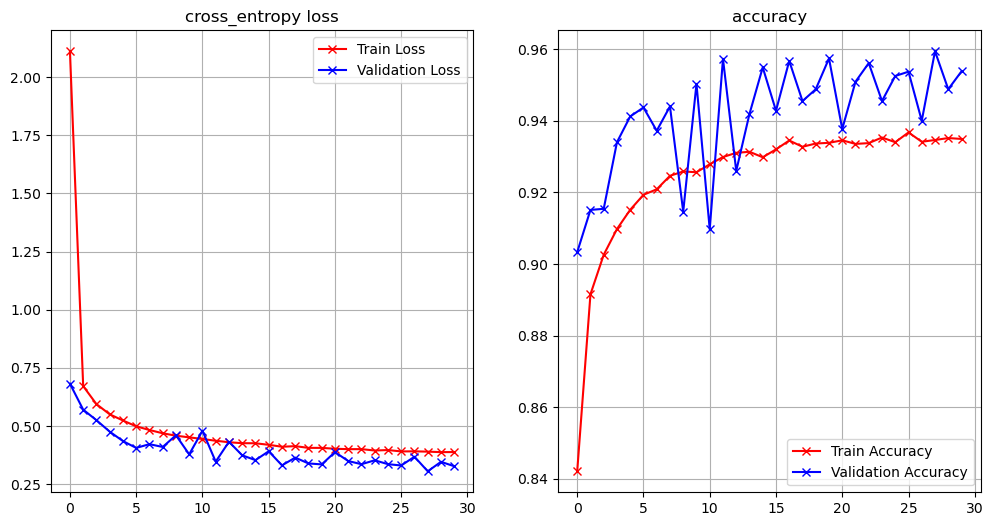

In [54]:
plot_loss_accuracy(history_2)

Overall, it shows that model_1 has the lowest mean testing loss (0.07) and the highest mean accuracy (0.98). model_2 has the lowest loss and accuracy since the individual losses and accuracies per epoch is unstable.

#### Conclusion

To conclude, regularization is important in training neural networks to ensure that the model does not overfit, which in a loss or accuracy plots, is a large gap between the training and testing values. In this Hands-on Activity, I was successful in performing this as evident in the loss and accuracy plots.